In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ws
ws.filterwarnings("ignore")

In [18]:
df = pd.read_csv("/kaggle/input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv")

In [19]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [20]:
df.columns.to_list()

['Make',
 'Model',
 'Vehicle Class',
 'Engine Size(L)',
 'Cylinders',
 'Transmission',
 'Fuel Type',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Fuel Consumption Comb (mpg)',
 'CO2 Emissions(g/km)']

In [21]:
# clean Column name 
def clean_name(name):
    return name.strip().lower().replace("/", "_per_").replace(" ", "_")

In [22]:
df.rename(columns = clean_name, inplace = True)

In [23]:
df.head()

,make,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l_per_100_km),fuel_consumption_hwy_(l_per_100_km),fuel_consumption_comb_(l_per_100_km),fuel_consumption_comb_(mpg),co2_emissions(g_per_km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [24]:
df.isna().sum()

make                                    0
model                                   0
vehicle_class                           0
engine_size(l)                          0
cylinders                               0
transmission                            0
fuel_type                               0
fuel_consumption_city_(l_per_100_km)    0
fuel_consumption_hwy_(l_per_100_km)     0
fuel_consumption_comb_(l_per_100_km)    0
fuel_consumption_comb_(mpg)             0
co2_emissions(g_per_km)                 0
dtype: int64

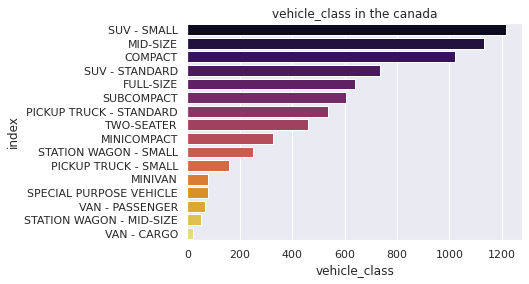

In [31]:
sns.set()
plt.title("vehicle_class in the canada")
sns.barplot(y="index", x = "vehicle_class", data = df.vehicle_class.value_counts().reset_index(), palette="inferno")
plt.show()

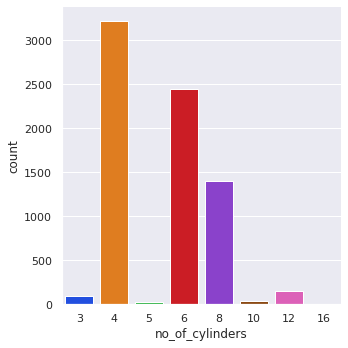

In [38]:
# Calculate No. of cylinders in the car
temp = df.cylinders.value_counts().reset_index().rename(columns = {"index": "no_of_cylinders", "cylinders": "count"})
sns.set()
sns.catplot(x="no_of_cylinders", y ="count", data = temp, kind = "bar", palette="bright")
plt.show()

Most Vechicles are probably having the 4 Cylinders 

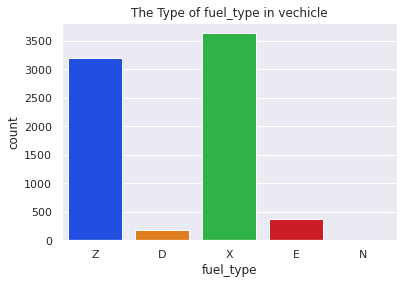

In [42]:
# Checking the fuel type 
sns.set()
plt.title("The Type of fuel_type in vechicle")
sns.countplot(df.fuel_type, palette="bright")
plt.show()

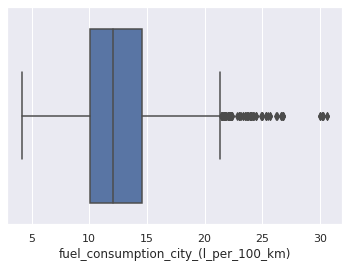

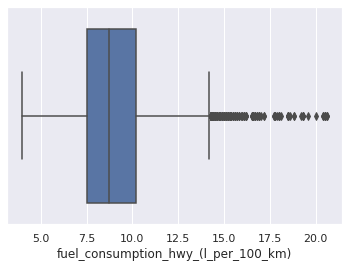

In [48]:
# Checking the fuel_consumption_city_(l_per_100_km)	 
sns.boxplot(df["fuel_consumption_city_(l_per_100_km)"])
plt.show ()
sns.boxplot(df["fuel_consumption_hwy_(l_per_100_km)"])
plt.show()

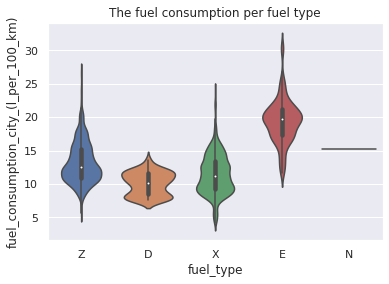

In [51]:
# Checking fuel consumption on highway by type

sns.set()
plt.title("The fuel consumption per fuel type")
sns.violinplot(y="fuel_consumption_city_(l_per_100_km)", x = "fuel_type", data= df)
plt.show()

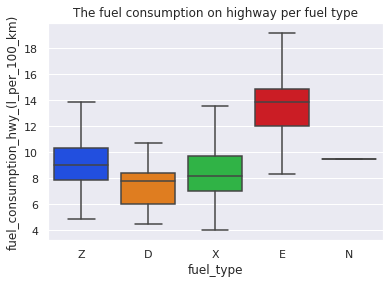

In [55]:
# Checking fuel consumption by type

sns.set()
plt.title("The fuel consumption on highway per fuel type")
sns.boxplot(y="fuel_consumption_hwy_(l_per_100_km)", x = "fuel_type", data= df, palette="bright", sym = "")
plt.show()

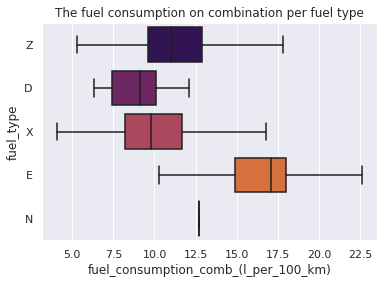

In [58]:
# Checking fuel consumption by type

sns.set()
plt.title("The fuel consumption on combination per fuel type")
sns.boxplot(x="fuel_consumption_comb_(l_per_100_km)", y = "fuel_type", data= df, palette="inferno", sym = "")
plt.show()

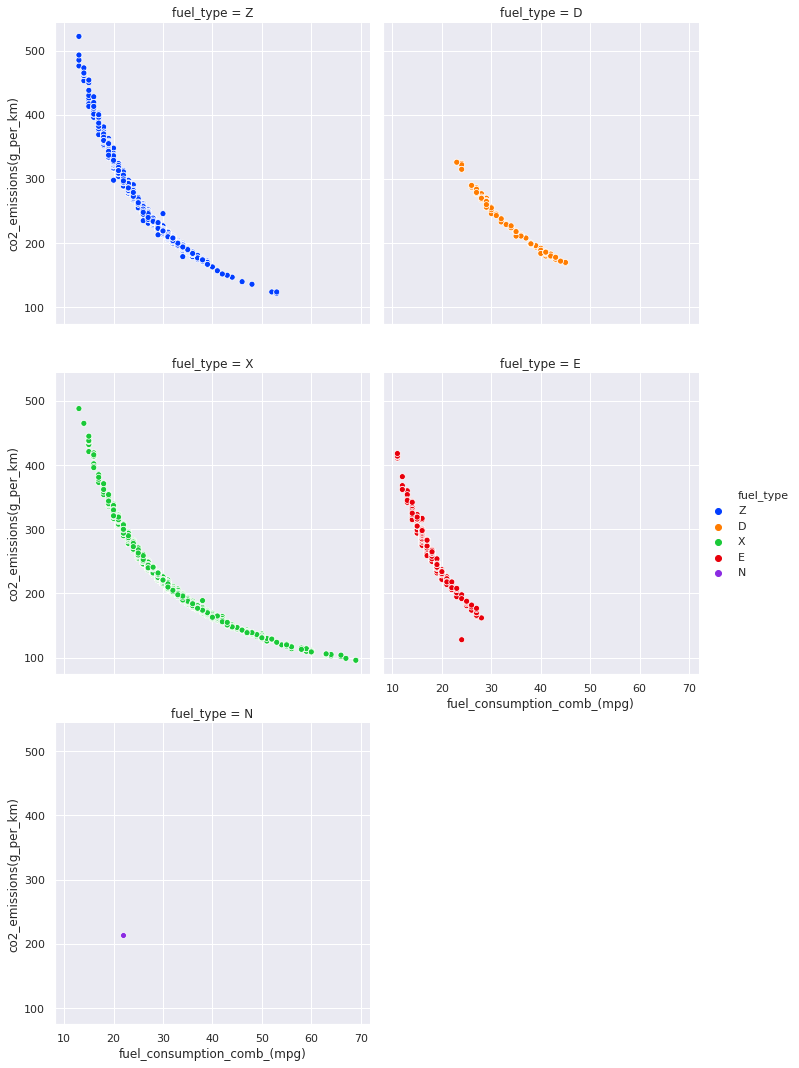

In [63]:
# checking the fuel consumption and the co2 emission

sns.set()
sns.relplot(x="fuel_consumption_comb_(mpg)", y="co2_emissions(g_per_km)", data = df, palette="bright", hue = "fuel_type", col = "fuel_type", col_wrap=2)
plt.show()

# ***This plot is help to interprete the each fuel type and the emission of the fuel***

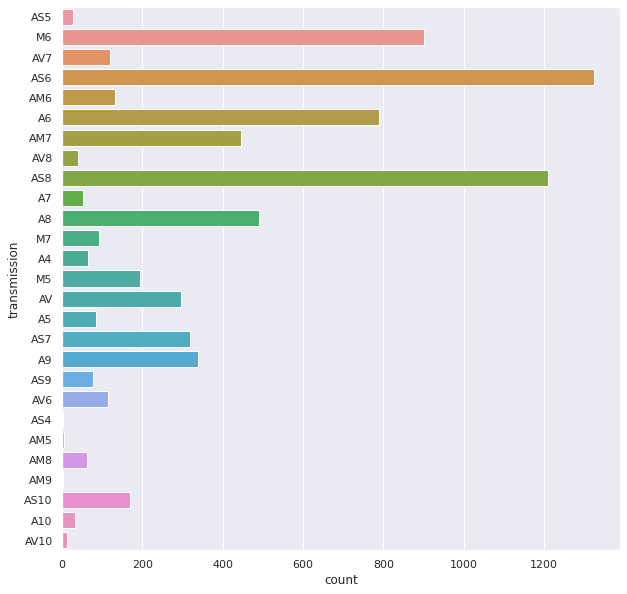

In [67]:
# Checking the  transmission type  
sns.set()
plt.figure(figsize = (10,10))
sns.countplot(y= df["transmission"])
plt.show()

# A56 is the most occuring transmission type

In [73]:
temp1 =  df.groupby("fuel_type")["co2_emissions(g_per_km)"].mean().reset_index()

Average CO2 Emission Per fuel type


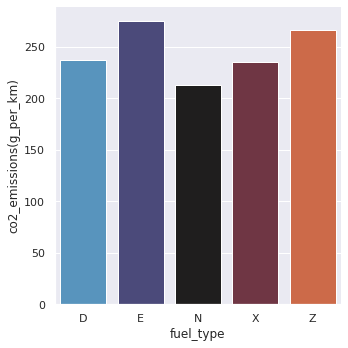

In [95]:
sns.set()
print("Average CO2 Emission Per fuel type")
g = sns.catplot(x ="fuel_type", y ="co2_emissions(g_per_km)", data = temp1, kind = "bar", palette="icefire")
plt.show()

# The Fuel type E emittes the most CO2 

In [94]:
temp3 = round(df.groupby("vehicle_class")["co2_emissions(g_per_km)"].mean().reset_index(), 2)

Average CO2 Emission per vehicle_class 


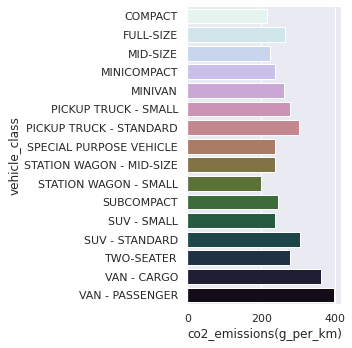

In [99]:
sns.set()
print("Average CO2 Emission per vehicle_class ")
g = sns.catplot(y ="vehicle_class", x ="co2_emissions(g_per_km)", data = temp3, kind = "bar", palette="cubehelix_r")
plt.show()

### Passenger VANS emitts the  most Co2 int the vechicle class 

### UPVOTE The NoteBook If u find IT  USeFul 


** :>) **